In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [46]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    

    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    return 1/len(y)*np.sum(abs(y-tx@ w),axis=0)

w=[1,2]
compute_loss(y,tx,w)

[1, 2, 3, 4]

# Grid Search

Fill in the function `grid_search()` below:

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    

    losses = np.zeros((len(w0), len(w1)))
    
    for i in range (0,len(w0)):
        for j in range (0,len(w1)):
            losses[i,j]=compute_loss(y,tx,[w0[i],w1[j]])
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4.443009009145579, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.514 seconds


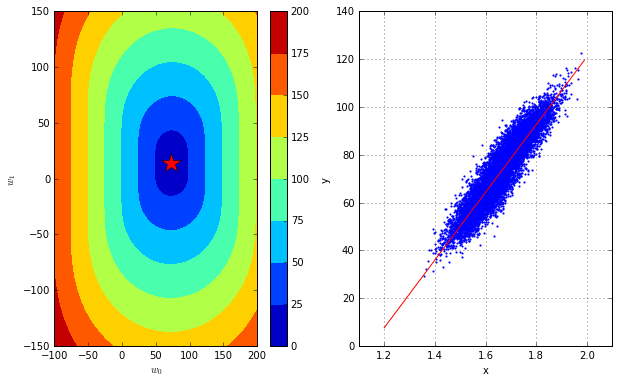

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [47]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    
    #compute_loss
    #1/len(y)*np.sum(abs(y-tx@ w),axis=0)
    
    N=len(y)
    subgradient=[0,0]
    for i in range(0,N):
        if((y[i]-w[1]*tx[i,1]-w[0])>0): 
            subgradient=np.add(subgradient,[-1,-tx[i,1]])
        else :
            subgradient =np.add(subgradient,[1,tx[i,1]])
        
    
    #gradient=-1/N * (tx.T)  @ (y-tx@ w)
    return 1/N*subgradient

compute_subgradient(y,tx,[100,20])

array([ 0.998     ,  0.00414807])

Please fill in the functions `gradient_descent` below:

In [48]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss=compute_loss(y,tx,w)
        subgradient=compute_subgradient(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        
        w=w-gamma*subgradient
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [53]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 3

# Initialization
w_initial = np.array([100.0, 10.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=26.706077997894813, w0=97.0, w1=10.000000000000007
Gradient Descent(1/49): loss=23.706077997894813, w0=94.0, w1=10.000000000000014
Gradient Descent(2/49): loss=20.70607799789482, w0=91.0, w1=10.000000000000021
Gradient Descent(3/49): loss=17.708321356152204, w0=88.0066, w1=10.00474114184075
Gradient Descent(4/49): loss=14.735982342113145, w0=85.0528, w1=10.04355648701584
Gradient Descent(5/49): loss=11.88290043385176, w0=82.2388, w1=10.189463776198942
Gradient Descent(6/49): loss=9.356999471121995, w0=79.7512, w1=10.546088357027068
Gradient Descent(7/49): loss=7.4216810813240945, w0=77.737, w1=11.175613502372112
Gradient Descent(8/49): loss=6.075936373103784, w0=76.1926, w1=11.891684233053745
Gradient Descent(9/49): loss=5.22390809184104, w0=75.0598, w1=12.521242760507363
Gradient Descent(10/49): loss=4.747062602349458, w0=74.2888, w1=12.97072109544019
Gradient Descent(11/49): loss=4.53307909337133, w0=73.82499999999999, w1=13.245587724854927
Gradient Desce

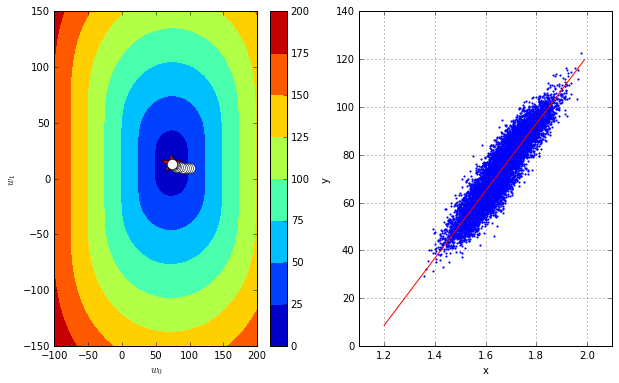

In [54]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [55]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************
    

    stoch_gradient=compute_subgradient(y,tx,w)
    loss=compute_loss(y,tx,w)
    return stoch_gradient,loss


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    
    w=initial_w
    ws=[initial_w]
    losses=[]
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            stoch_gradient,loss=compute_stoch_gradient(minibatch_y,minibatch_tx,w)
        w=w-gamma*stoch_gradient;
        ws.append(np.copy(w))
        losses.append(loss)
        
    return losses, ws

In [60]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 2.5
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=9.407 seconds


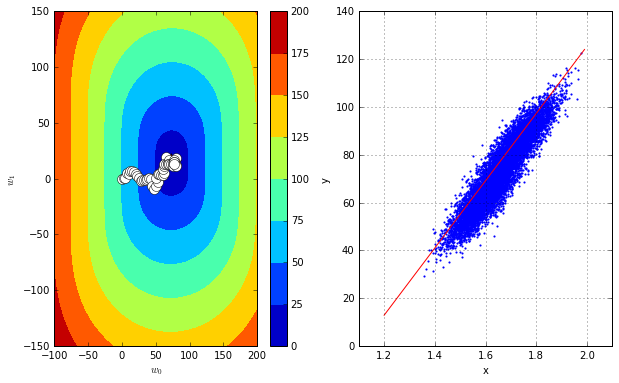

In [61]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))